<a href="https://colab.research.google.com/github/Bharatgaur/Exploratory-data-analysis-EDA-/blob/main/Automobile_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

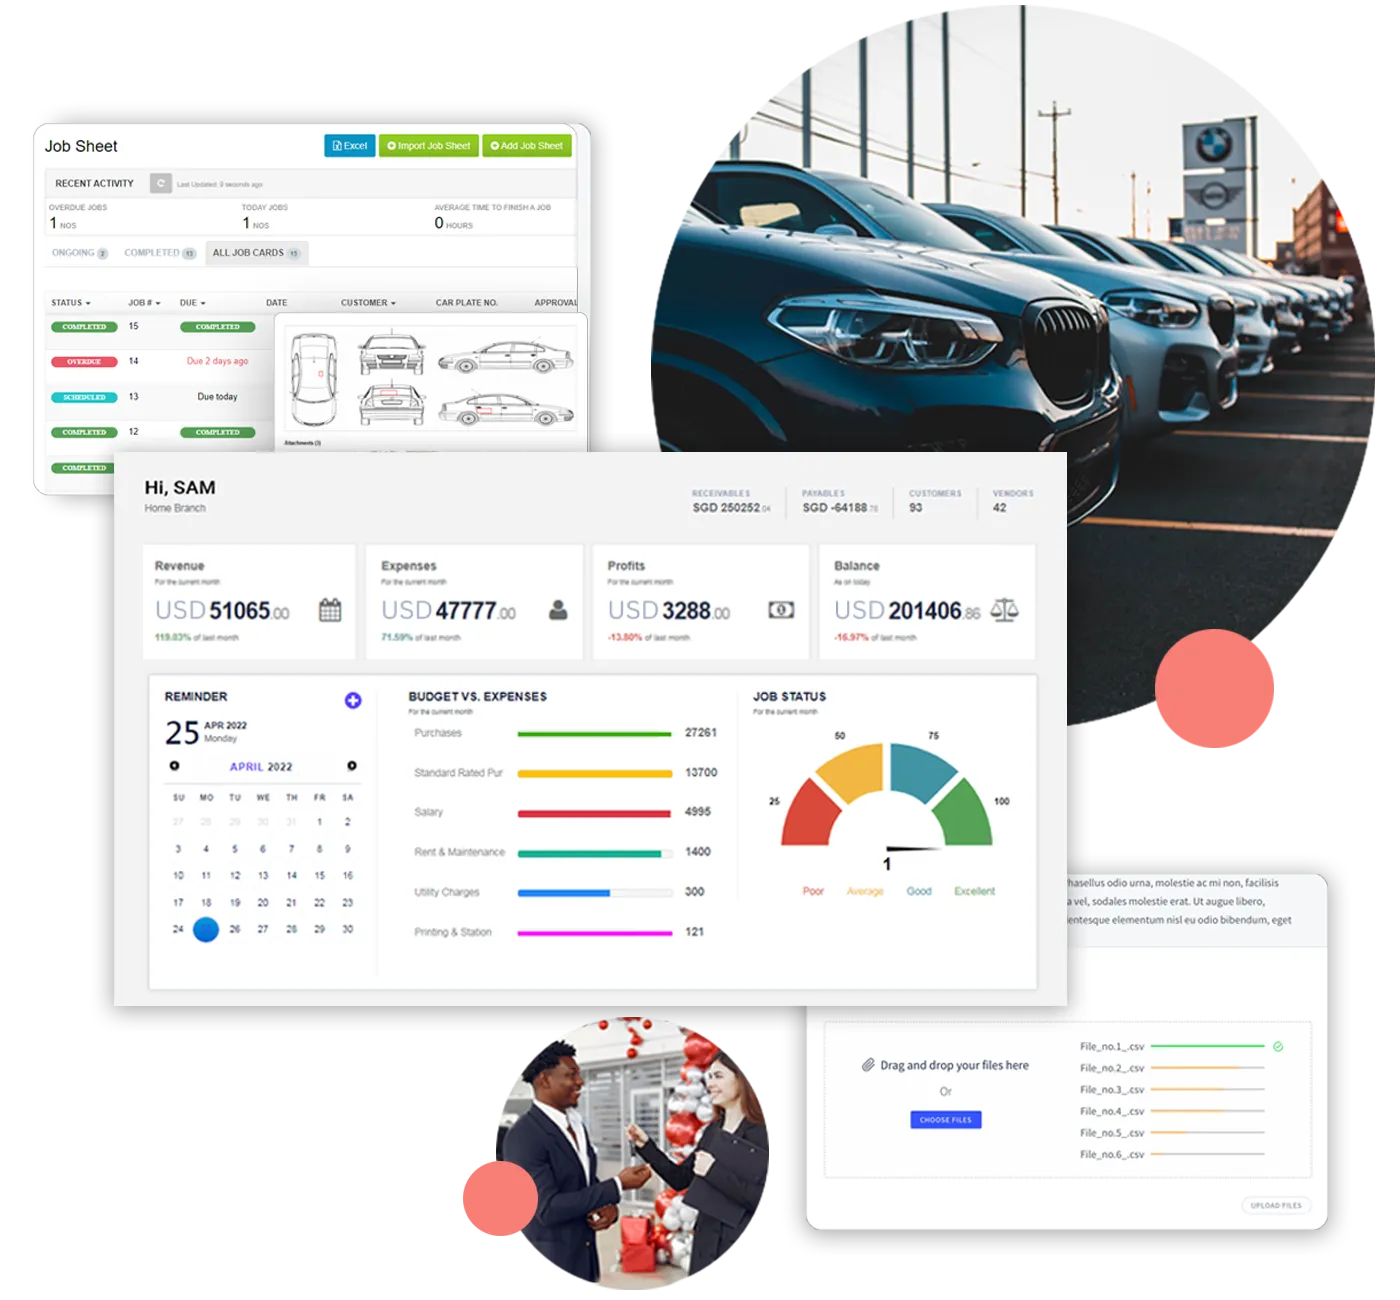

# **Automobile Sales**
Dataset (Kaggle) https://www.kaggle.com/datasets/ddosad/auto-sales-data

Problem Statement:
The task is to perform exploratory data analysis (EDA) on an Automobile Sales dataset to gain insights into the sales trends, customer behavior, and overall performance of the sales operations. The dataset contains information about individual orders placed by customers, including the quantity ordered, price of each item, sales amount, order date, customer details, product information, and other relevant attributes.

Questions for EDA:
1. What is the distribution of the quantity ordered in the dataset?
2. How does the price of each item vary across different product lines?
3. What is the overall sales trend over time? Are there any seasonal patterns?
4. What is the average sales amount per order?
5. How do the sales amounts vary based on the status of the orders?
6. Which product lines contribute the most to the total sales revenue?
7. Is there a correlation between the number of days since the last order and the order quantity?
8. How do the deal sizes vary across different product lines?
9. What are the top-selling products based on the quantity ordered?
10. How do the sales amounts vary across different countries or regions?
11. Are there any outliers in the dataset, and if so, what might be the reasons behind them?
12. Is there any relationship between the manufacturer’s suggested retail price (MSRP) and the actual price each item sells for?
13. What is the average number of items per order?
14. How do the sales amounts differ based on the customer’s location (city or country)?
15. Are there any trends or patterns in customer purchasing behavior based on the frequency of orders?

These questions will help in exploring various aspects of the Automobile Sales dataset and provide insights that can inform decision-making processes related to sales strategies, inventory management, and customer relationship management.







# **Import package**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns


# **Loading the Dataset**

In [2]:
df = pd.read_csv("/content/Auto Sales data.csv")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,02/12/2019,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,31/01/2020,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,01/03/2020,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,28/03/2020,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,06/05/2020,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [6]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [11]:
df.columns.values

array(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'], dtype=object)

# **01. What is the distribution of the quantity ordered in the dataset?**


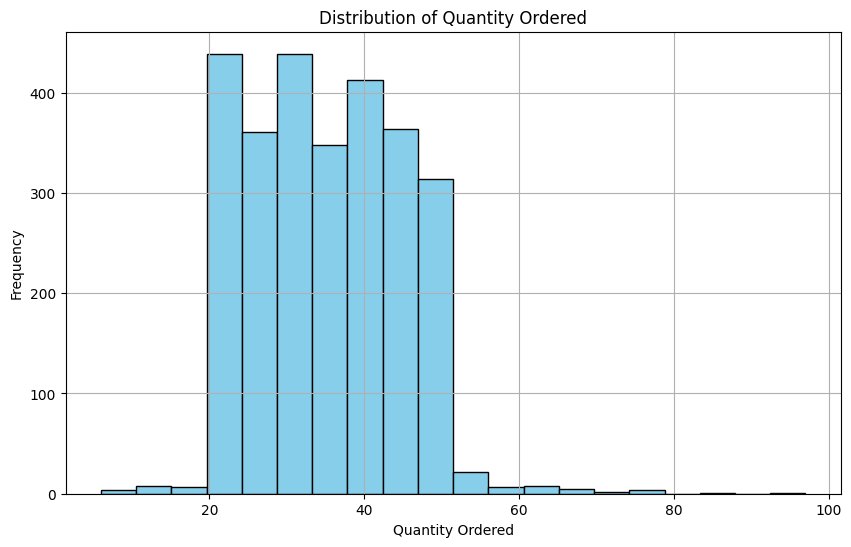

Mean: 35.10302147797597
Median: 35.0
Standard Deviation: 9.762135423504992


In [13]:
quantity_ordered = df['QUANTITYORDERED']

# Plot the Distribution
plt.figure(figsize=(10, 6))
plt.hist(quantity_ordered, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analyze the Distribution
# You can visually inspect the histogram to understand the distribution.
# Additionally, you can calculate statistical measures like mean, median, and standard deviation if needed.
print("Mean:", quantity_ordered.mean())
print("Median:", quantity_ordered.median())
print("Standard Deviation:", quantity_ordered.std())

# Interpretation
# Based on the histogram and statistical measures, draw conclusions about the distribution of quantity ordered.



# **02. How does the price of each item vary across different product lines?**


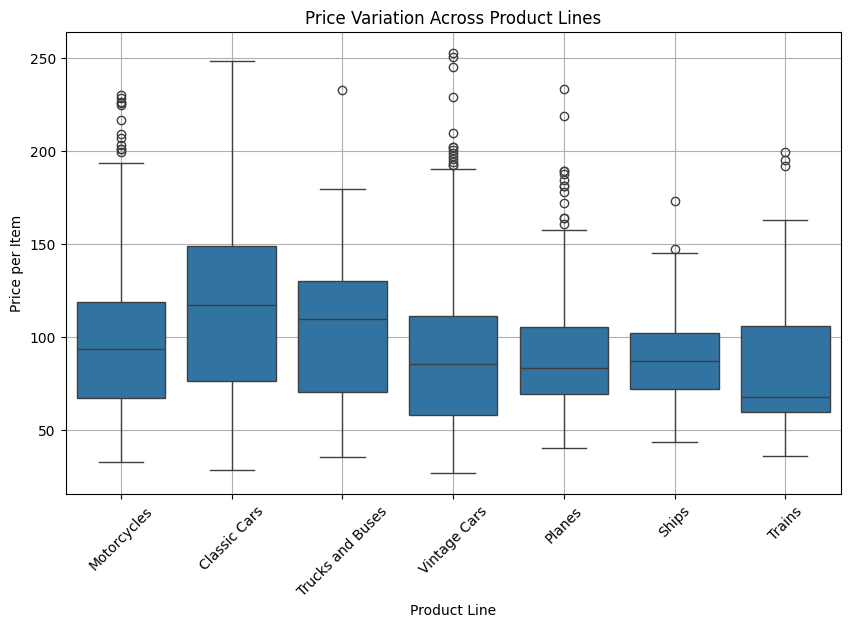

                  count        mean        std    min      25%     50%  \
PRODUCTLINE                                                              
Classic Cars      949.0  115.195680  46.871651  28.29  76.4300  117.33   
Motorcycles       313.0   99.767125  43.128680  32.59  67.0300   93.54   
Planes            304.0   90.517829  31.540388  40.22  69.6000   83.32   
Ships             230.0   88.169261  22.502965  43.68  72.0425   87.11   
Trains             77.0   84.108701  35.396545  36.07  59.6500   67.73   
Trucks and Buses  295.0  104.344983  34.450123  35.71  70.1900  109.96   
Vintage Cars      579.0   90.011261  40.987745  26.88  58.2900   85.75   

                       75%     max  
PRODUCTLINE                         
Classic Cars      148.9900  248.59  
Motorcycles       118.9400  230.46  
Planes            105.2675  233.48  
Ships             102.2000  173.46  
Trains            106.2100  199.49  
Trucks and Buses  130.0900  232.74  
Vintage Cars      111.2800  252.87  


In [14]:
product_price_df = df[['PRODUCTLINE', 'PRICEEACH']]

# Group Data by Product Line
grouped_df = product_price_df.groupby('PRODUCTLINE')

# Calculate Summary Statistics
price_stats = grouped_df['PRICEEACH'].describe()

# Visualize the Data
plt.figure(figsize=(10, 6))
sns.boxplot(x='PRODUCTLINE', y='PRICEEACH', data=df)
plt.title('Price Variation Across Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Price per Item')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 7: Interpret the Results
# Analyze the box plot and summary statistics to understand how the price of each item varies across different product lines.
print(price_stats)



# **03. What is the overall sales trend over time? Are there any seasonal patterns?**



<ipython-input-15-8f52bd5d816b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


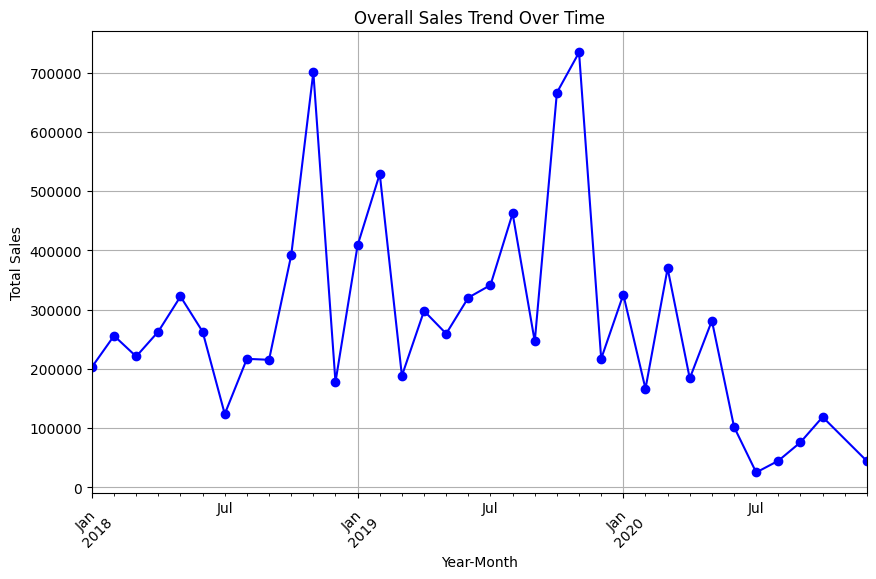

In [15]:
# Convert Date Column to DateTime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Group Data by Time Period
df['YearMonth'] = df['ORDERDATE'].dt.to_period('M')

# Calculate Total Sales for Each Time Period
sales_trend = df.groupby('YearMonth')['SALES'].sum()

# Visualize the Sales Trend
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o', color='b')
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Identify Seasonal Patterns
# Analyze the plot to identify any seasonal patterns or trends in sales over time.


# **04. What is the average sales amount per order?**



In [17]:
# Calculate Average Sales per Order
average_sales_per_order = df['SALES'].mean()

# Display the Result
print("Average Sales Amount per Order:", average_sales_per_order)


Average Sales Amount per Order: 3553.0475828176195


# **05. How do the sales amounts vary based on the status of the orders?**


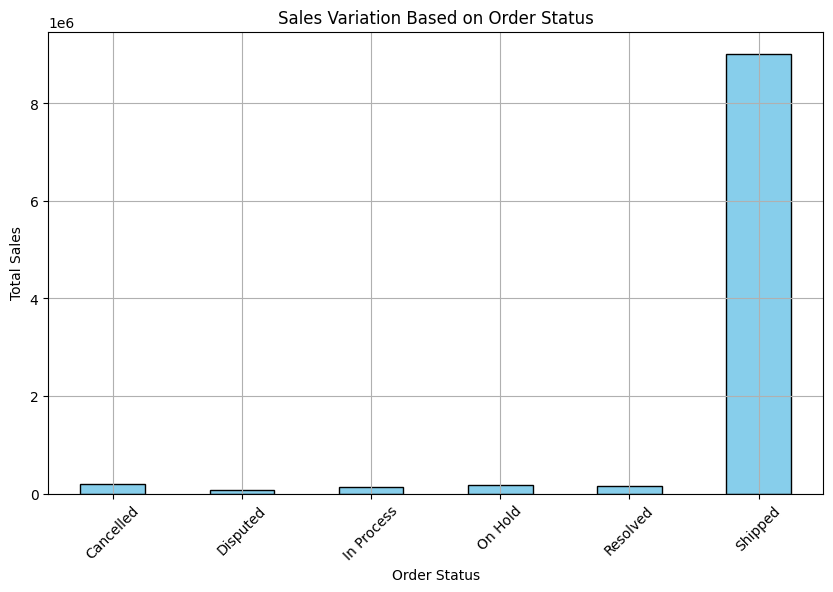

In [18]:

# Group Data by Order Status
grouped_df = df.groupby('STATUS')

# Calculate Total Sales for Each Order Status
sales_by_status = grouped_df['SALES'].sum()

# Visualize the Sales Variation
plt.figure(figsize=(10, 6))
sales_by_status.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales Variation Based on Order Status')
plt.xlabel('Order Status')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



# **06. Which product lines contribute the most to the total sales revenue?**



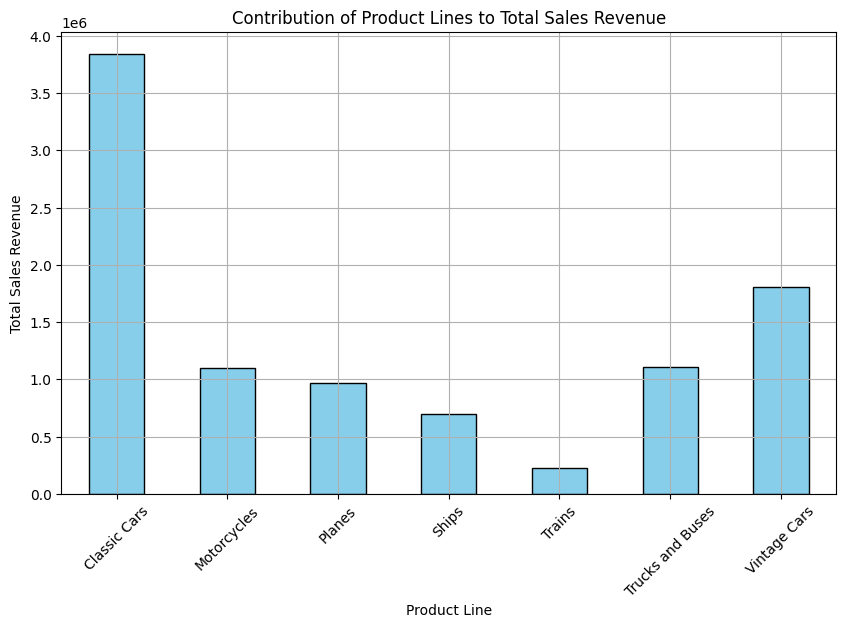

In [19]:
# Group Data by Product Line
grouped_df = df.groupby('PRODUCTLINE')

# Calculate Total Sales for Each Product Line
sales_by_product_line = grouped_df['SALES'].sum()

# Visualize the Contribution
plt.figure(figsize=(10, 6))
sales_by_product_line.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Contribution of Product Lines to Total Sales Revenue')
plt.xlabel('Product Line')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# **07. Is there a correlation between the number of days since the last order and the order quantity?**



In [20]:
# Calculate Correlation
correlation = df['DAYS_SINCE_LASTORDER'].corr(df['QUANTITYORDERED'])

# Interpret the Result
print("Correlation between Days Since Last Order and Order Quantity:", correlation)


Correlation between Days Since Last Order and Order Quantity: -0.021922708068230344


# **08. How do the deal sizes vary across different product lines?**



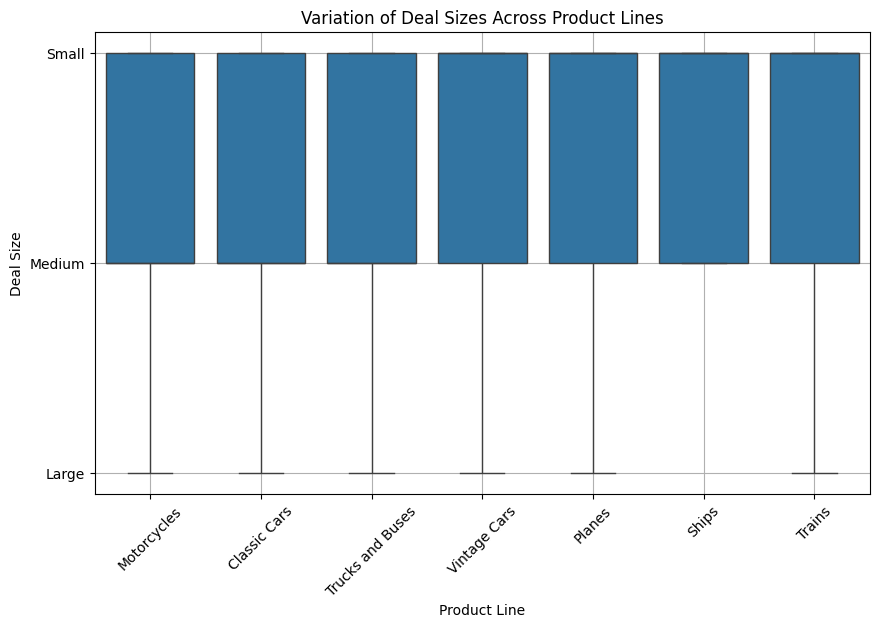

In [23]:
# Group Data by Product Line
grouped_df = df.groupby('PRODUCTLINE')

# Calculate Average Deal Size for Each Product Line
deal_size_by_product_line = grouped_df['DEALSIZE'].value_counts(normalize=True).unstack().fillna(0)

# Visualize the Variation
plt.figure(figsize=(10, 6))
sns.boxplot(x='PRODUCTLINE', y='DEALSIZE', data=df)
plt.title('Variation of Deal Sizes Across Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Deal Size')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# **09. What are the top-selling products based on the quantity ordered?**



In [24]:
# Group Data by Product Code
grouped_df = df.groupby('PRODUCTCODE')

# Calculate Total Quantity Ordered for Each Product
total_quantity_ordered = grouped_df['QUANTITYORDERED'].sum()

# Identify Top-Selling Products
top_selling_products = total_quantity_ordered.nlargest(10)  # Select the top 10 products
print("Top Selling Products based on Quantity Ordered:")
print(top_selling_products)

Top Selling Products based on Quantity Ordered:
PRODUCTCODE
S18_3232     1754
S18_4600     1031
S700_4002    1029
S12_4473     1024
S24_3856     1017
S24_3949     1008
S50_1341      999
S24_2300      996
S18_2319      993
S700_2610     990
Name: QUANTITYORDERED, dtype: int64


# **10. How do the sales amounts vary across different countries or regions?**



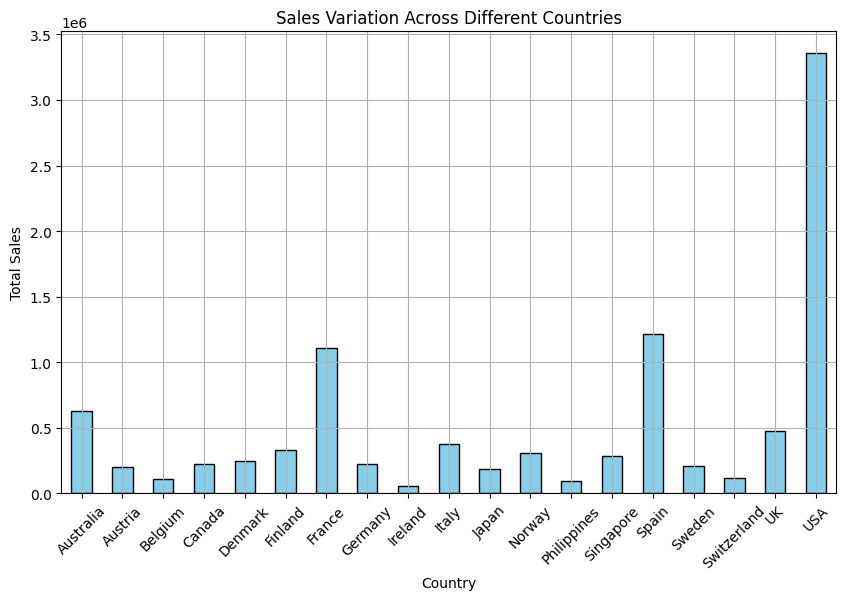

In [25]:
# Group Data by Country
grouped_df = df.groupby('COUNTRY')

# Calculate Total Sales for Each Country
sales_by_country = grouped_df['SALES'].sum()

# Visualize the Variation
plt.figure(figsize=(10, 6))
sales_by_country.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales Variation Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **11. Are there any outliers in the dataset, and if so, what might be the reasons behind them?**



In [27]:
# Identify Outliers
# Useing statistical methods such as z-score to identify outliers.
outliers = df[(zscore(df['SALES']) > 3)]

# Analyze Potential Reasons
# Examine the outliers and investigate potential reasons behind them.
print(outliers)


      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
28          10150               45     244.30                8  10993.50   
41          10304               47     216.44                6  10172.70   
42          10312               48     242.16                3  11623.70   
49          10424               50     240.02                6  12001.00   
75          10120               46     201.41                2   9264.86   
82          10223               49     199.47                3   9774.03   
96          10403               66     180.10                9  11886.60   
97          10417               56     164.61                4   9218.16   
121         10400               64     150.96                9   9661.44   
153         10147               48     192.62                7   9245.76   
162         10266               44     208.19               14   9160.36   
163         10276               50     192.62                3   9631.00   
176         

# **12. Is there any relationship between the manufacturer’s suggested retail price (MSRP) and the actual price each item sells for?**


In [28]:
# Calculate Correlation
correlation = df['MSRP'].corr(df['PRICEEACH'])

# Interpret the Result
print("Correlation between MSRP and Actual Selling Price:", correlation)


Correlation between MSRP and Actual Selling Price: 0.7783931745462115


# **13. What is the average number of items per order?**



In [30]:
# Calculate Average Number of Items per Order
average_items_per_order = df['QUANTITYORDERED'].mean()

print("Average Number of Items per Order:", average_items_per_order)

Average Number of Items per Order: 35.10302147797597


# **14. How do the sales amounts differ based on the customer’s location (city or country)?**


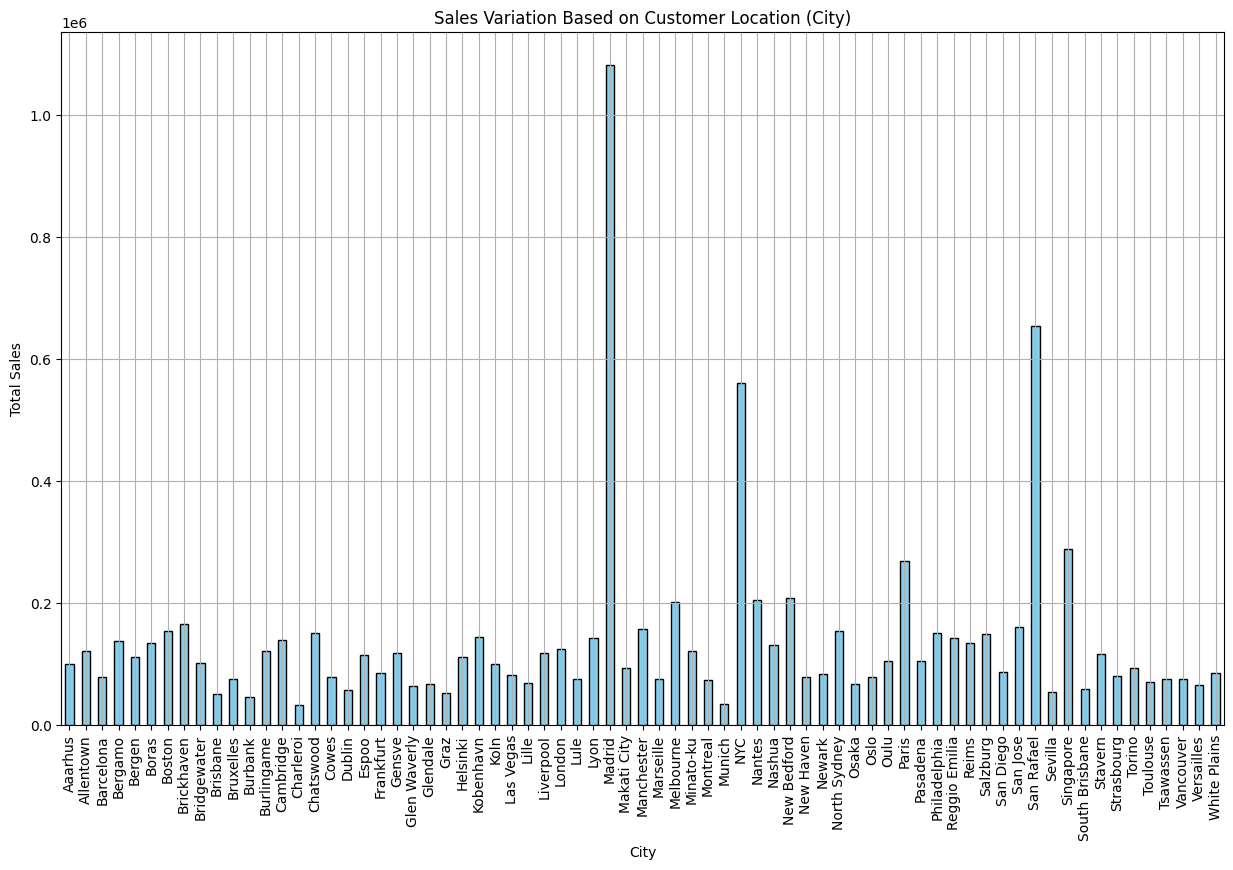

In [33]:
# Group Data by Location
grouped_df = df.groupby('CITY')

# Calculate Total Sales for Each Location
sales_by_location = grouped_df['SALES'].sum()

# Visualize the Variation
plt.figure(figsize=(15, 9))
sales_by_location.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales Variation Based on Customer Location (City)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# **15. Are there any trends or patterns in customer purchasing behavior based on the frequency of orders?**

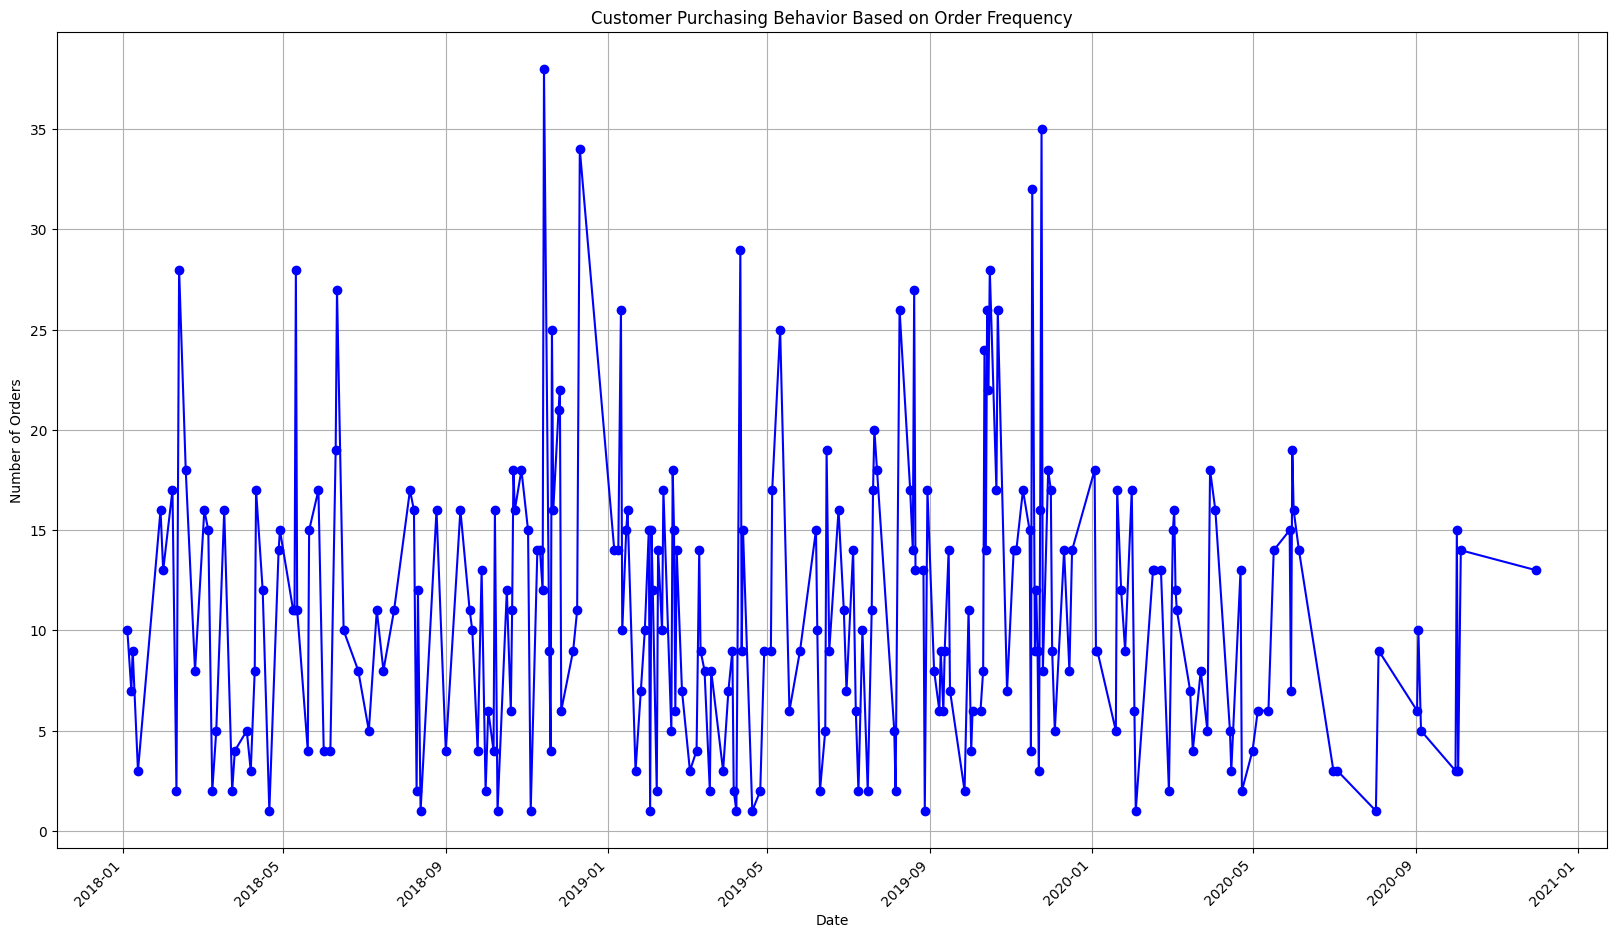

In [36]:
# Calculate Order Frequency
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
order_frequency = df['ORDERDATE'].value_counts()

# Visualize the Trends
plt.figure(figsize=(20, 12))
order_frequency.plot(kind='line', marker='o', color='b')
plt.title('Customer Purchasing Behavior Based on Order Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
